# TP_autoencoder_reconstruction_mnist_cifar

# Part . Autoencoder

## 1.1 Feed-forward Autoencoder 

We write a quick feed-forward autoencoder mapping from images of size 728 to 32, then decode back to size 728

In [1]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

from keras.datasets import mnist, cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D, Lambda
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import keras.losses as Losses
#import keras.backend as K

import random
import matplotlib.pyplot as plt
import sys
import numpy as np


In [2]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
#Note above we used the binary_categorical_crossentropy, you could also use the mean_squared_error,
#in that case you could also replace the sigmoid activation of the last layer by a ReLu/Linear activation

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320  

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [6]:
def print_imgs(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

**Train the Autoencoder**

original images:


<Figure size 1440x144 with 0 Axes>

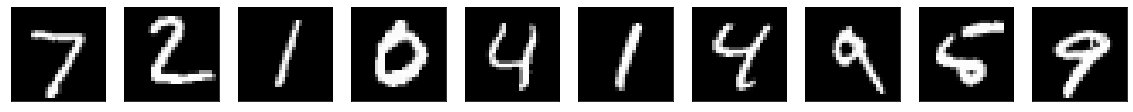

Reconstruction error:

[0.24799296259880066, 0.14969542622566223]


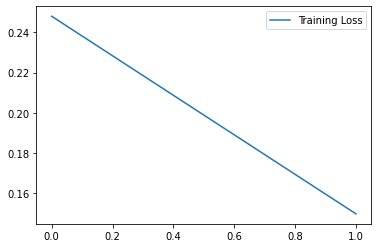

decoded images at epoch  5 :
1/1 [==============================] - 0s 130ms/step


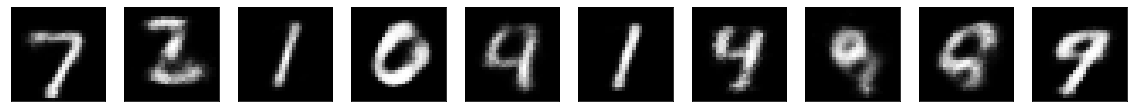

Corresponding mean square error: 

img  0   0.010373203
img  1   0.04235515
img  2   0.0050006243
img  3   0.019529374
img  4   0.018437387
img  5   0.0041280985
img  6   0.033154696
img  7   0.03464658
img  8   0.060991272
img  9   0.018655613
Reconstruction error:

[0.1305629163980484, 0.12203890830278397]


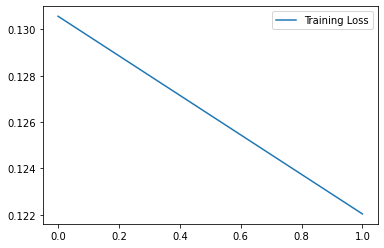

decoded images at epoch  10 :
1/1 [==============================] - 0s 25ms/step


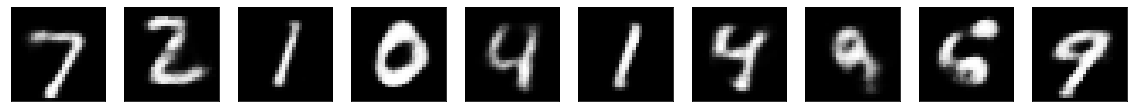

Corresponding mean square error: 

img  0   0.006557507
img  1   0.028792731
img  2   0.003362717
img  3   0.0143745225
img  4   0.013515277
img  5   0.002479393
img  6   0.023477966
img  7   0.02599093
img  8   0.04227932
img  9   0.013697711


In [7]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])
    
for i in range(2):
    history=autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)
   
    print('Reconstruction error:\n')
    print(history.history['loss'])
    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    #We compute the reconstruction error for each test image
    print('Corresponding mean square error: \n')
    for i in range(10):
        mse = Losses.MeanSquaredError()
        print('img ',i,' ',mse(decoded_imgs[i],x_test[i]).numpy())



### Super encoding
In this case we reduce the encoded dimension to 2. 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
 dense_9 (Dense)             (None, 32)                96        
                                                                 
 dense_10 (Dense)            (None, 128)               4224

<Figure size 1440x144 with 0 Axes>

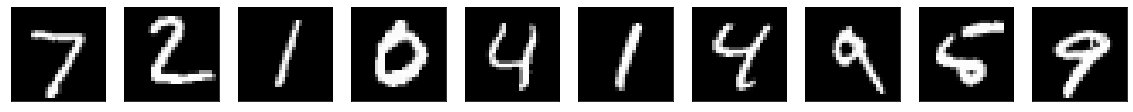

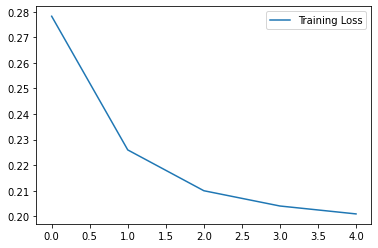

decoded images at epoch  5 :
1/1 [==============================] - 0s 96ms/step


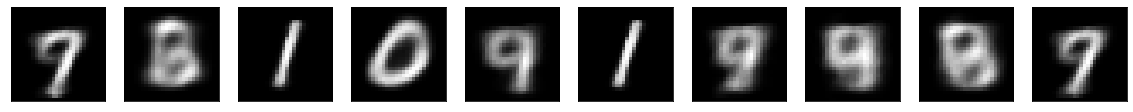

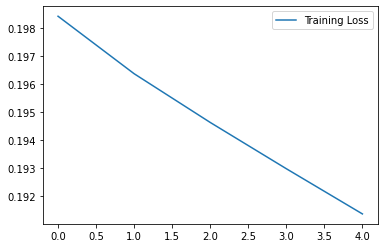

decoded images at epoch  10 :
1/1 [==============================] - 0s 23ms/step


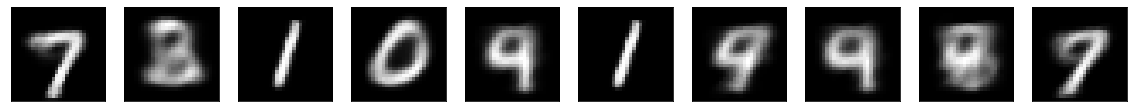

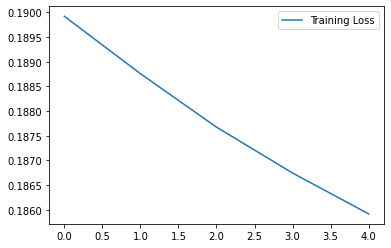

decoded images at epoch  15 :
1/1 [==============================] - 0s 23ms/step


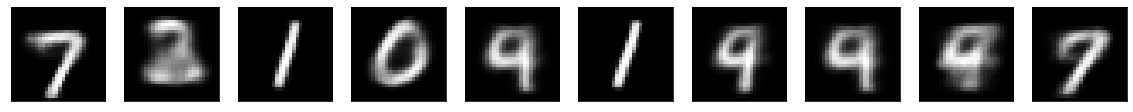

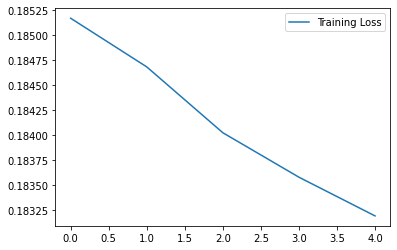

decoded images at epoch  20 :
1/1 [==============================] - 0s 26ms/step


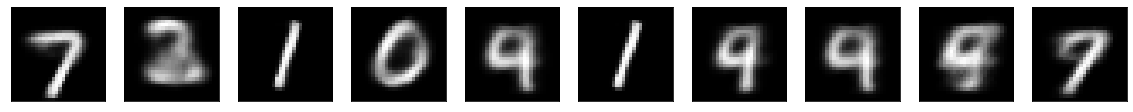

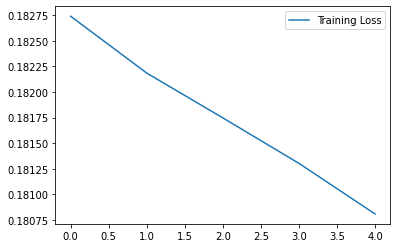

decoded images at epoch  25 :
1/1 [==============================] - 0s 25ms/step


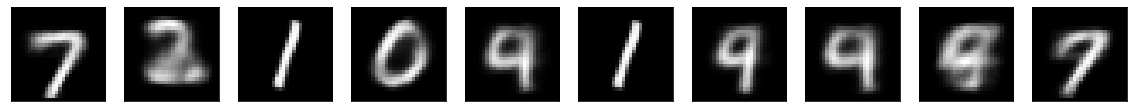

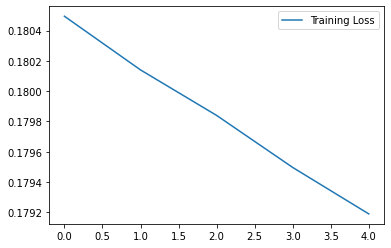

decoded images at epoch  30 :
1/1 [==============================] - 0s 23ms/step


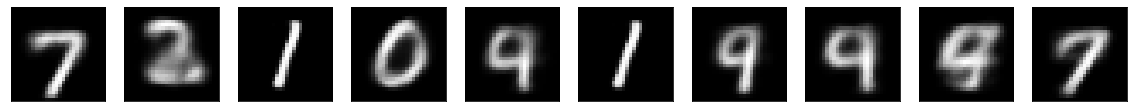

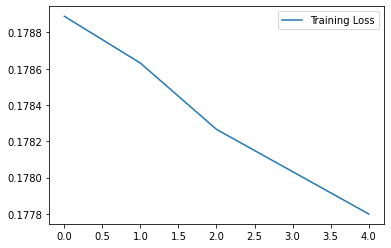

decoded images at epoch  35 :
1/1 [==============================] - 0s 22ms/step


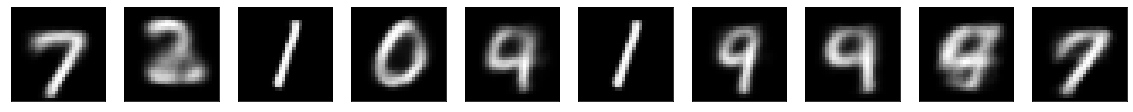

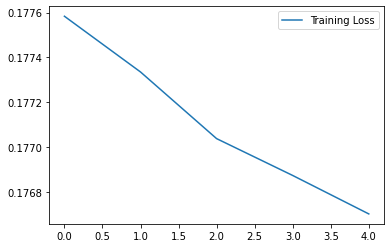

decoded images at epoch  40 :
1/1 [==============================] - 0s 20ms/step


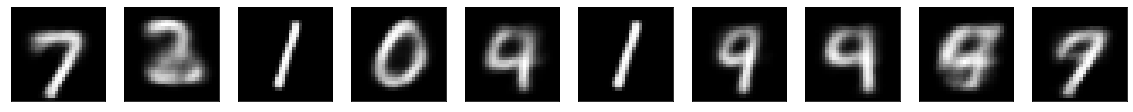

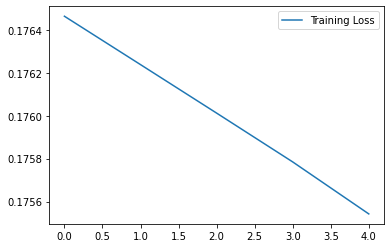

decoded images at epoch  45 :
1/1 [==============================] - 0s 22ms/step


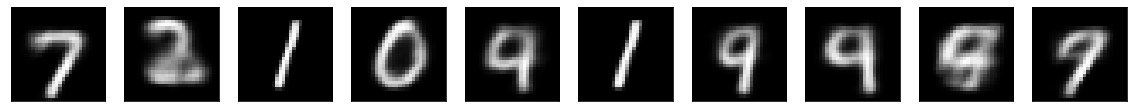

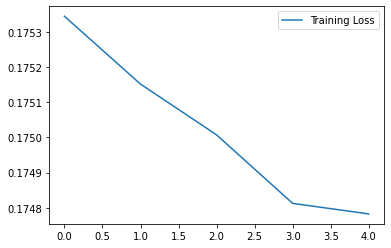

decoded images at epoch  50 :
1/1 [==============================] - 0s 22ms/step


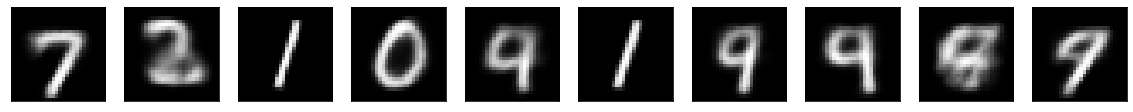

In [8]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])
    
for i in range(10):
    history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)

## 1.2 Convolutional autoencoder

### Exercise.  
Write code for a convolutional autoencoder and see whether the performance is improved

In [9]:
### Your code here
# Encoder
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)


# Decoder
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(decoded)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(decoded)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248

original images:


<Figure size 1440x144 with 0 Axes>

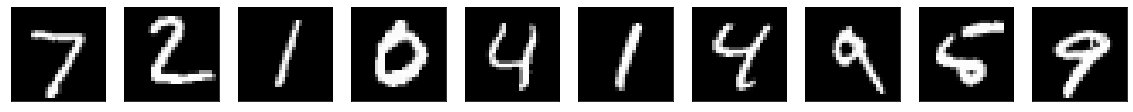

decoded images at epoch  2 :
1/1 [==============================] - 0s 117ms/step


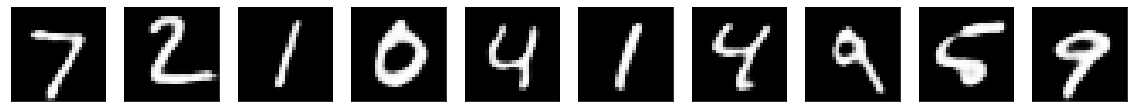

decoded images at epoch  4 :
1/1 [==============================] - 0s 36ms/step


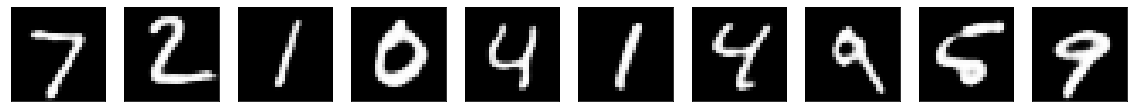

decoded images at epoch  6 :
1/1 [==============================] - 0s 37ms/step


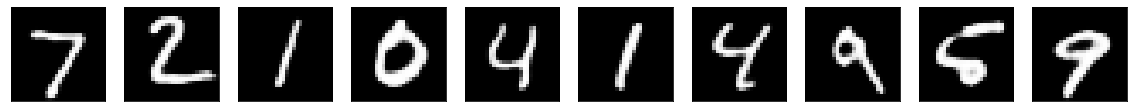

decoded images at epoch  8 :
1/1 [==============================] - 0s 47ms/step


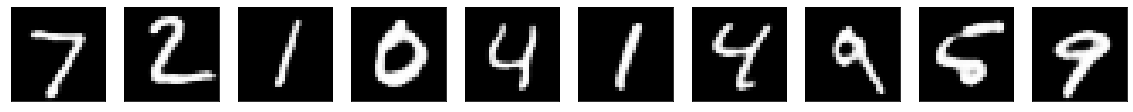

decoded images at epoch  10 :
1/1 [==============================] - 0s 35ms/step


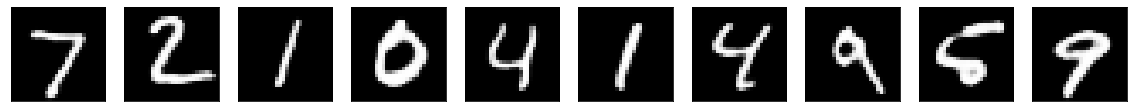

decoded images at epoch  12 :
1/1 [==============================] - 0s 39ms/step


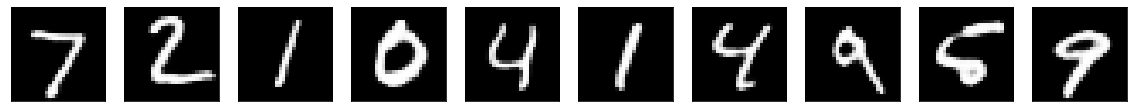

decoded images at epoch  14 :
1/1 [==============================] - 0s 31ms/step


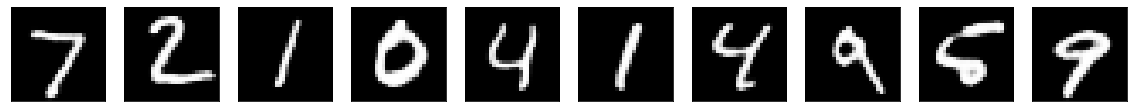

decoded images at epoch  16 :
1/1 [==============================] - 0s 31ms/step


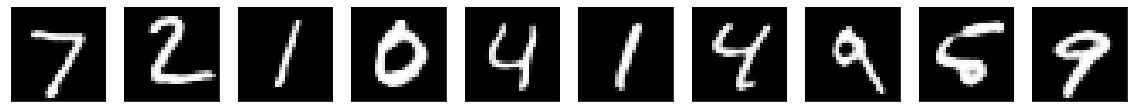

decoded images at epoch  18 :
1/1 [==============================] - 0s 44ms/step


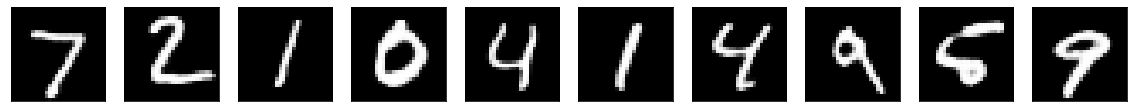

decoded images at epoch  20 :
1/1 [==============================] - 0s 29ms/step


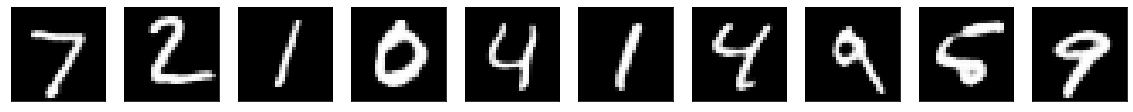

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])
    
for i in range(10):
    autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)

## 1.3 Application to image denoising

We first create some noisy images

Original images in test


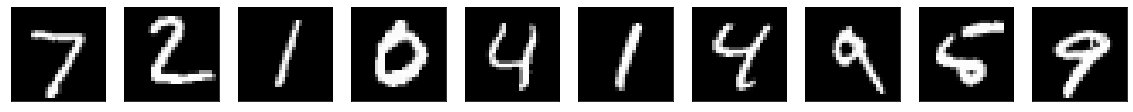

Corresponding noisy images


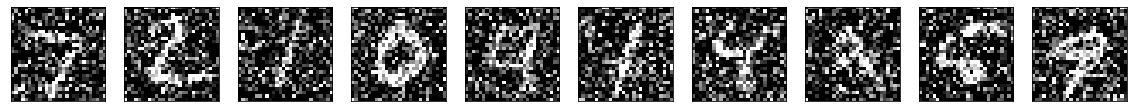

In [11]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print('Original images in test')
print_imgs(x_test[:10])
print('Corresponding noisy images')
print_imgs(x_test_noisy[:10])

And build a convolutional autoencoder

In [12]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

## Your code here
# Encoder
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)


# Decoder
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(decoded)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(decoded)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)       9248

Suppose that we have only 1000 available pairs of noisy-clean images to train.

Test images


<Figure size 1440x144 with 0 Axes>

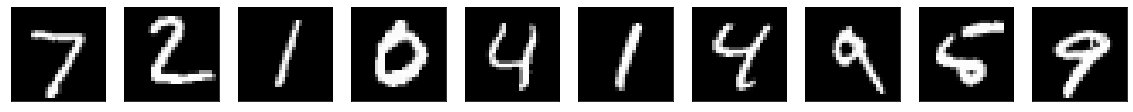

Noisy Test images


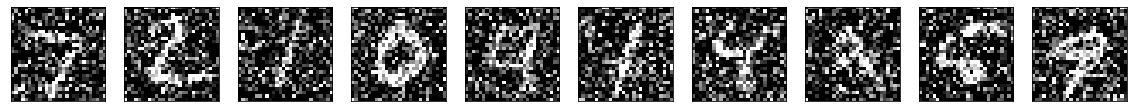

###

decoded test images at epoch  5 :
1/1 [==============================] - 0s 102ms/step


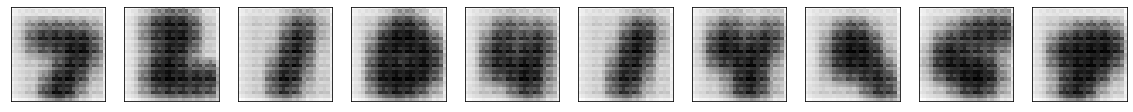

decoded noisy test images at epoch  5 :
1/1 [==============================] - 0s 36ms/step


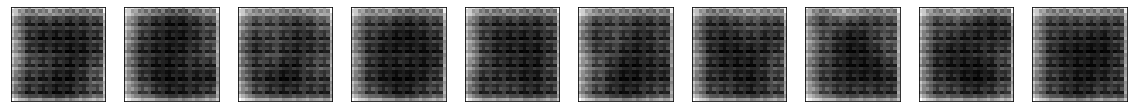

###

###

decoded test images at epoch  10 :
1/1 [==============================] - 0s 27ms/step


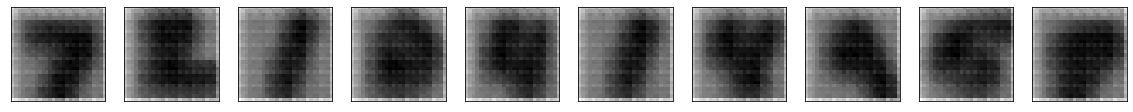

decoded noisy test images at epoch  10 :
1/1 [==============================] - 0s 31ms/step


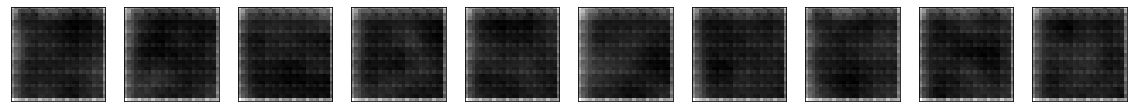

###

###

decoded test images at epoch  15 :
1/1 [==============================] - 0s 27ms/step


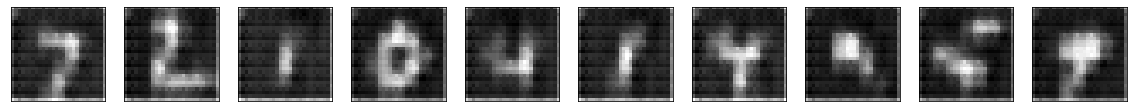

decoded noisy test images at epoch  15 :
1/1 [==============================] - 0s 27ms/step


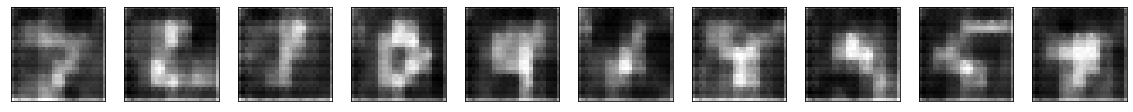

###

###

decoded test images at epoch  20 :
1/1 [==============================] - 0s 25ms/step


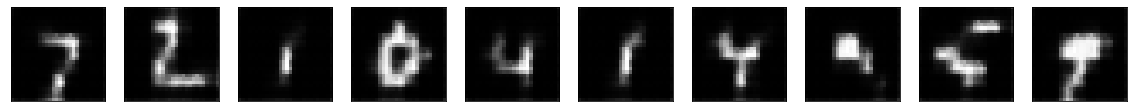

decoded noisy test images at epoch  20 :
1/1 [==============================] - 0s 26ms/step


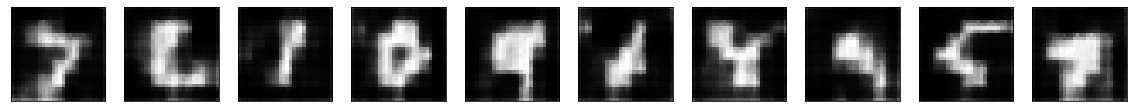

###

###

decoded test images at epoch  25 :
1/1 [==============================] - 0s 29ms/step


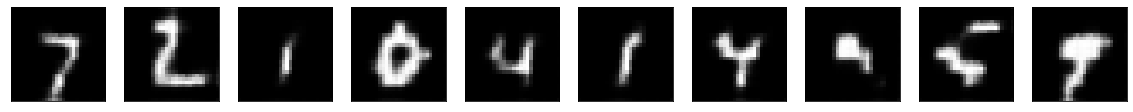

decoded noisy test images at epoch  25 :
1/1 [==============================] - 0s 27ms/step


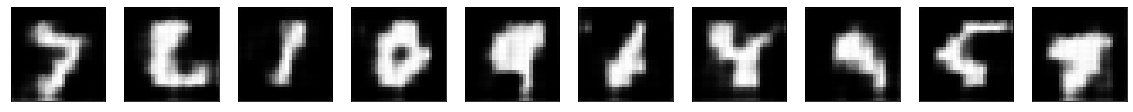

###

###

decoded test images at epoch  30 :
1/1 [==============================] - 0s 29ms/step


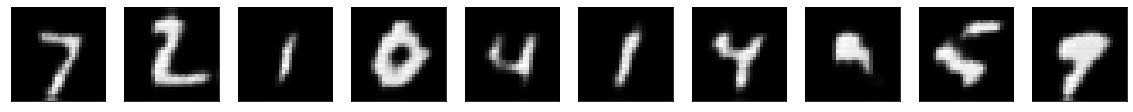

decoded noisy test images at epoch  30 :
1/1 [==============================] - 0s 31ms/step


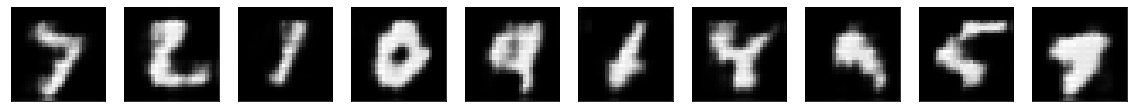

###

###

decoded test images at epoch  35 :
1/1 [==============================] - 0s 27ms/step


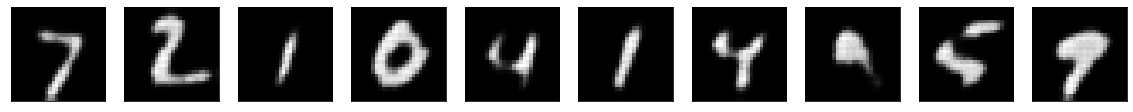

decoded noisy test images at epoch  35 :
1/1 [==============================] - 0s 26ms/step


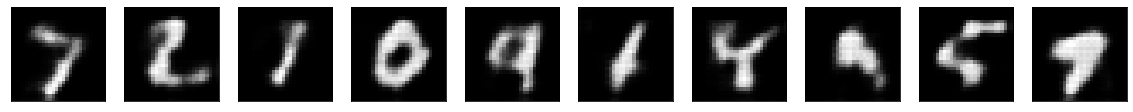

###

###

decoded test images at epoch  40 :
1/1 [==============================] - 0s 35ms/step


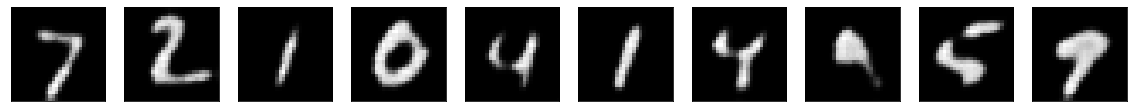

decoded noisy test images at epoch  40 :
1/1 [==============================] - 0s 35ms/step


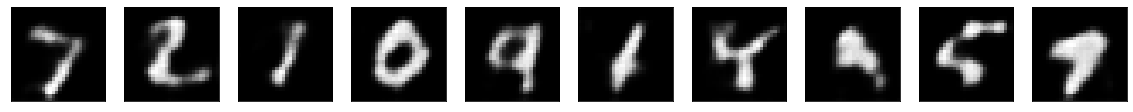

###

###

decoded test images at epoch  45 :
1/1 [==============================] - 0s 34ms/step


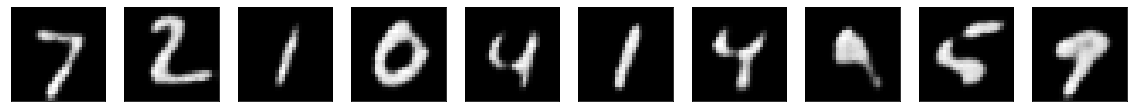

decoded noisy test images at epoch  45 :
1/1 [==============================] - 0s 32ms/step


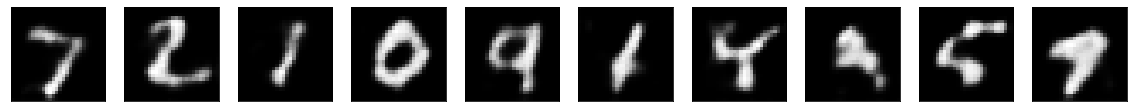

###

###

decoded test images at epoch  50 :
1/1 [==============================] - 0s 33ms/step


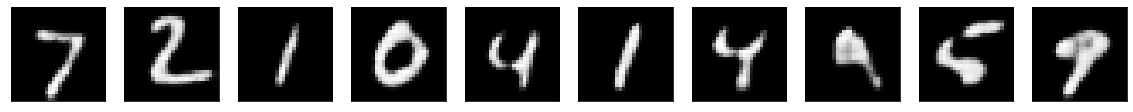

decoded noisy test images at epoch  50 :
1/1 [==============================] - 0s 33ms/step


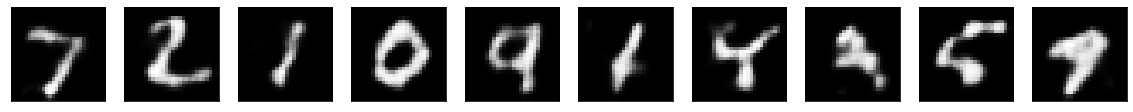

###



In [13]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs(x_test[:10])
print('Noisy Test images')

print_imgs(x_test_noisy[:10])
    
for i in range(10):
    autoencoder.fit(x_train_noisy[:1000], x_train[:1000],
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = autoencoder.predict(x_test_noisy[:10])
    print_imgs(decoded_imgs2)
    print('###\n')

## 1.4. Autoencoder with CIFAR-10

### Exercise 4. 
Build your Autoencoder with CIFAR-10 and try to denoise CIFAR-10 images

In [19]:
### Your code here
(train_data_clean, _), (test_data_clean, _) = cifar10.load_data()
train_data_clean = train_data_clean.astype('float32') / 255.
test_data_clean = test_data_clean.astype('float32') / 255.
def add_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_cifar = add_noise_and_clip_data(train_data_clean)
test_data_noisy_cifar = add_noise_and_clip_data(test_data_clean)


In [ ]:
def print_imgs_cifar(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


In [3]:
train_data_clean = x_train.astype('float32') / 255.
test_data_clean = x_test.astype('float32') / 255.
def add_noise_and_clip_data(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   data = np.clip(data, 0., 1.)
   return data
train_data_noisy_cifar = add_noise_and_clip_data(train_data_clean)
test_data_noisy_cifar = add_noise_and_clip_data(test_data_clean)

In [14]:
## Your code here
from keras.layers import ReLU
# Encoder
input_img = Input(shape=(32,32,3,))
encoded = Conv2D(64, (3, 3), activation="relu", padding="same")(input_img)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)


# Decoder
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
decoded = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(decoded)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(decoded)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 32)       9248

Test images


<Figure size 1440x144 with 0 Axes>

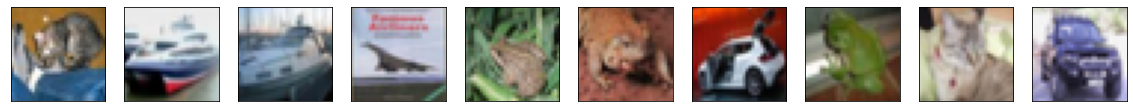

Noisy Test images


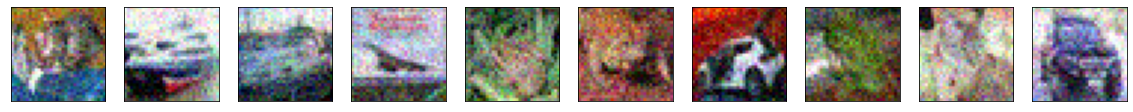

###

decoded test images at epoch  5 :
1/1 [==============================] - 0s 41ms/step


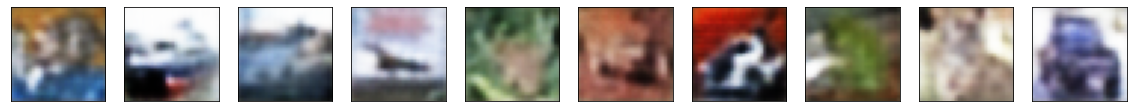

decoded noisy test images at epoch  5 :
1/1 [==============================] - 0s 56ms/step


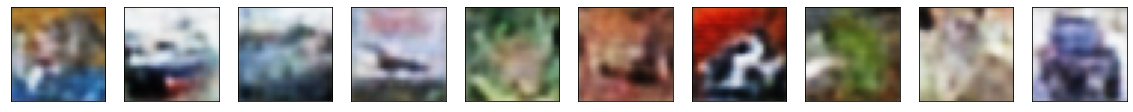

###

###

decoded test images at epoch  10 :
1/1 [==============================] - 0s 45ms/step


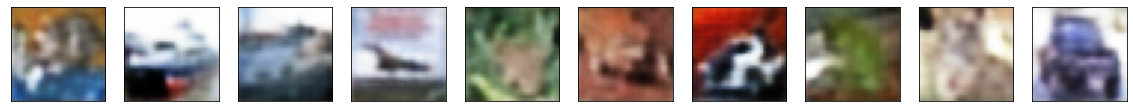

decoded noisy test images at epoch  10 :
1/1 [==============================] - 0s 43ms/step


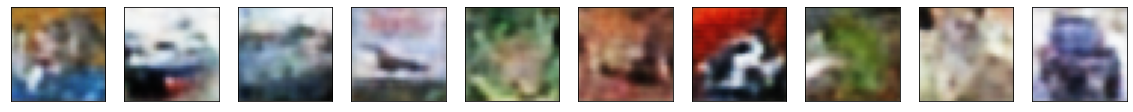

###

###

decoded test images at epoch  15 :
1/1 [==============================] - 0s 36ms/step


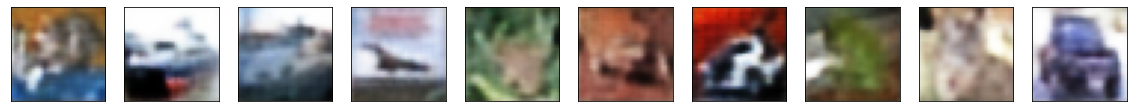

decoded noisy test images at epoch  15 :
1/1 [==============================] - 0s 44ms/step


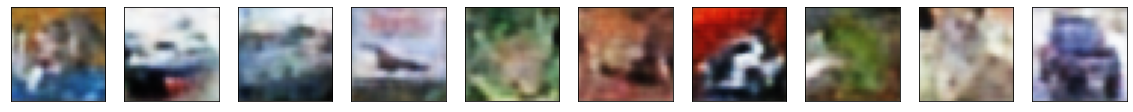

###

###

decoded test images at epoch  20 :
1/1 [==============================] - 0s 75ms/step


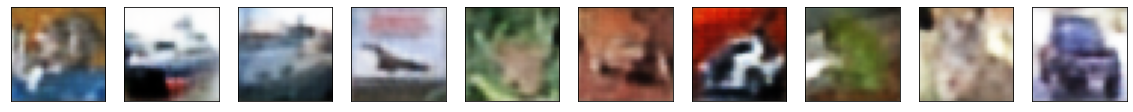

decoded noisy test images at epoch  20 :
1/1 [==============================] - 0s 61ms/step


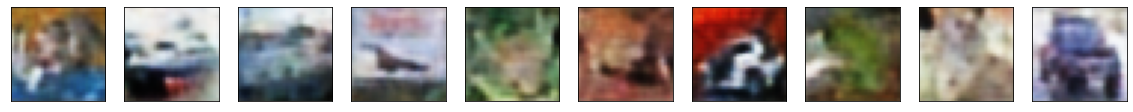

###

###

decoded test images at epoch  25 :
1/1 [==============================] - 0s 41ms/step


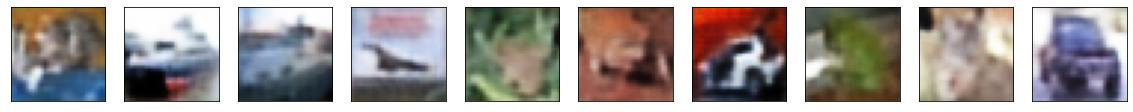

decoded noisy test images at epoch  25 :
1/1 [==============================] - 0s 46ms/step


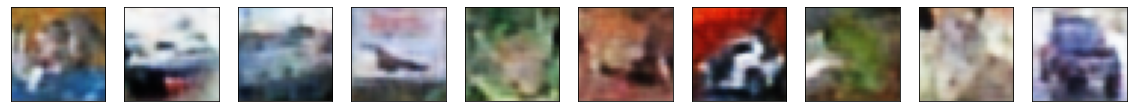

###



KeyboardInterrupt: ignored

In [18]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs_cifar(test_data_clean[:10])
print('Noisy Test images')

print_imgs_cifar(test_data_noisy_cifar[:10])
    
for i in range(10):
    autoencoder.fit(train_data_noisy_cifar, train_data_clean,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(test_data_clean[:10])
    print_imgs_cifar(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = autoencoder.predict(test_data_noisy_cifar[:10])
    print_imgs_cifar(decoded_imgs2)
    print('###\n')